<h2>Plot flight variables in time series format</h2>
<p>University of Wyoming flight data

In [1]:
# Load the needed packages
import numpy as np
import matplotlib.pyplot as plt

import awot
from awot.graph.common import create_basemap
from awot.graph import FlightLevel

%matplotlib inline

<b>Supply user information</b>

In [3]:
# Set the project name
Project="DYNAMO"
# Set the path for data file
flname="/Users/guy/data/king_air/copemed2013/flight/20130806.c1.nc"

<b>Set up some characteristics for plotting.</b>
<ul>
<li>Use Cylindrical Equidistant Area map projection.
<li>Set the spacing of the barbs and X-axis time step for labels.
<li>Set the start and end times for subsetting.
</ul>

In [6]:
proj = 'cea'
Wbarb_Spacing = 300 # Spacing of wind barbs along flight path (sec)

# Choose the X-axis time step (in seconds) where major labels will be
XlabStride = 3600

# Should landmarks be plotted? [If yes, then modify the section below
Lmarks=True

# Optional variables that can be included with AWOT
# Start and end times for track in Datetime instance format
start_time = "2013-08-06 00:00:00"
end_time = "2013-08-06 23:50:00"

corners = [-6.,49.,-3.,53.]

<b>Read in flight data</b>

In [4]:
fl = awot.io.read_netcdf(fname=flname, platform='uwka')

Using 'time' to make AWOT time variable


<b>Create the track figure for this flight</b>

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


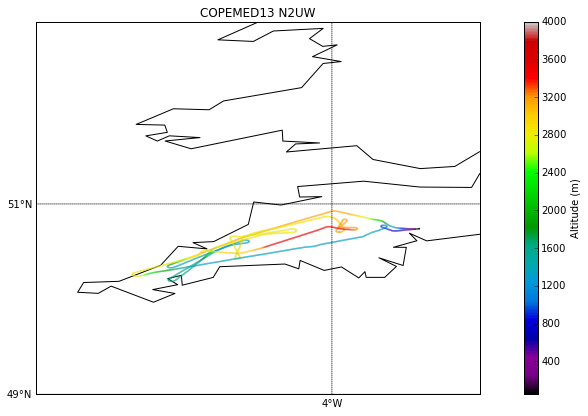

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

bm = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1.,ax=ax)

# Instantiate the Flight plotting routines
flp = FlightLevel(fl, basemap=bm)
flp.plot_trackmap(
#                 start_time=start_time, end_time=end_time,
                 color_by_altitude=True, track_cmap='spectral',
                 min_altitude=50., max_altitude= 4000.,
                 addlegend=True, addtitle=True)

<b>Let's query the flight dictionary to see what fields we have</b>

In [8]:
fl.keys()

['mixing_ratio',
 'swbottom',
 'pcasp_mean_diam',
 'pressure_altitude',
 'thetae',
 'irtop',
 'irbottom',
 'pcasp_num',
 'Uwind',
 'pitch',
 'pcasp_conc',
 'latitudinal_wind',
 'pcasp_surf_area_conc',
 'tas',
 'temperature',
 'wind_spd',
 'altitude',
 'true_heading',
 'platform',
 'flight_number',
 'co2_conc',
 'lwc',
 'h2o_conc',
 'ias',
 'Vwind',
 'swtop',
 'conc_cpc',
 'topo',
 'pressure',
 'thetad',
 'roll_angle',
 'Wwind',
 'longitudinal_wind',
 'dewpoint_temperature',
 'wind_dir',
 'latitude',
 'longitude',
 'pcasp_vol_conc',
 'project',
 'relative_humidity',
 'time',
 'turb']

<b>Create figure and produce a multi-panel times series plot</b>

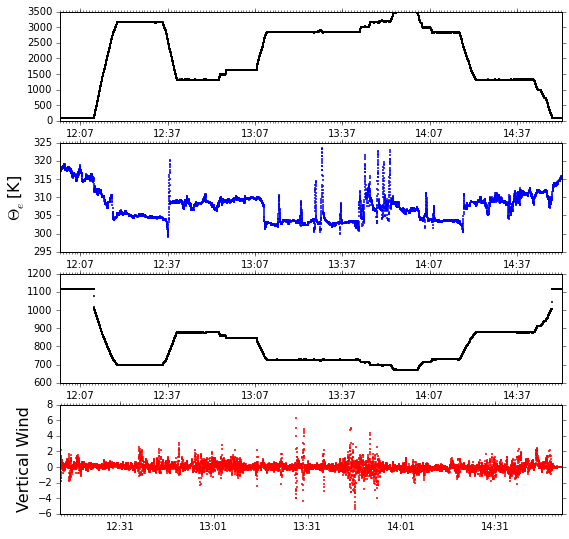

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(9, 9))

flp.plot_timeseries('altitude', color='k', marker='o', msize=1.5, lw=2,
                    dForm='%H:%M', tz=None, xdate=True,
#                    date_MinTicker='minute', other_MajTicks=None, other_MinTicks=None,
#                    other_min=None, other_max=None, 
#                    start_time=start_time, end_time=end_time,
#                    title=None, xlab=' ', ylab=' ', 
                    ax=ax1)

flp.plot_timeseries('thetae', color='b', ax=ax2, ylab=r"${\Theta}$$_{e}$ [K]")
flp.plot_timeseries('pressure', color='k', ax=ax3)
flp.plot_timeseries('Wwind', color='r', ax=ax4, ylab="Vertical Wind")